In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True) 
import seaborn as sns
import DataScienceHelper as dsh
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.preprocessing import OneHotEncoder

sns.set_style('darkgrid')
pd.options.display.max_columns = 150

In [6]:
df = pd.read_excel('./Carpov/Sarah gets a diamond data.xls', header=2)
data = df.copy()
data

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...,...
5995,5996,1.03,Ideal,D,SI1,EX,EX,GIA,NaN
5996,5997,1.00,Very Good,D,SI1,VG,VG,GIA,NaN
5997,5998,1.02,Ideal,D,SI1,EX,EX,GIA,NaN
5998,5999,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   Carat Weight  6000 non-null   float64
 2   Cut           6000 non-null   object 
 3   Color         5999 non-null   object 
 4   Clarity       6000 non-null   object 
 5   Polish        6000 non-null   object 
 6   Symmetry      5999 non-null   object 
 7   Report        6000 non-null   object 
 8   Price         4500 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 422.0+ KB


In [8]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [9]:
for c in object_cols:
    print(data[c].unique())

['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal' '-' 'Ideallll'
 'ssssssssss']
['H' 'E' 'G' 'D' 'F' 'I' nan '-']
['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL' ' ']
['VG' 'ID' 'EX' 'G' 'НД']
['EX' 'ID' 'VG' 'G' '  ' nan]
['GIA' 'AGSL']


In [10]:
data[object_cols]

,Cut,Color,Clarity,Polish,Symmetry,Report
0,Ideal,H,SI1,VG,EX,GIA
1,Ideal,H,VS1,ID,ID,AGSL
2,Ideal,H,SI1,EX,EX,GIA
3,Ideal,E,SI1,VG,VG,GIA
4,Ideal,G,SI1,EX,EX,GIA
...,...,...,...,...,...,...
5995,Ideal,D,SI1,EX,EX,GIA
5996,Very Good,D,SI1,VG,VG,GIA
5997,Ideal,D,SI1,EX,EX,GIA
5998,Signature-Ideal,G,VS1,EX,EX,GIA


In [11]:
 data = data.dropna(axis=0)

In [12]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
for c in object_cols:
    print(data[c].unique())

Categorical variables:
['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']
['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal' '-' 'Ideallll'
 'ssssssssss']
['H' 'E' 'G' 'D' 'F' 'I']
['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
['VG' 'ID' 'EX' 'G' 'НД']
['EX' 'ID' 'VG' 'G' '  ']
['GIA' 'AGSL']


In [13]:
data = data.drop(data[data.Cut == '-'].index)
data = data.drop(data[data.Cut == 'Ideallll'].index)
data = data.drop(data[data.Cut == 'ssssssssss'].index)
data = data.drop(data[data.Clarity == ' '].index)
data = data.drop(data[data.Polish == 'НД'].index)
data = data.drop(data[data.Symmetry == '  '].index)
data = data.drop(data[data.Symmetry == 'НД'].index)


s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
for c in object_cols:
    print(data[c].unique())

Categorical variables:
['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']
['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
['H' 'E' 'G' 'D' 'F' 'I']
['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
['VG' 'ID' 'EX' 'G']
['EX' 'ID' 'VG' 'G']
['GIA' 'AGSL']


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4494 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4494 non-null   int64  
 1   Carat Weight  4494 non-null   float64
 2   Cut           4494 non-null   object 
 3   Color         4494 non-null   object 
 4   Clarity       4494 non-null   object 
 5   Polish        4494 non-null   object 
 6   Symmetry      4494 non-null   object 
 7   Report        4494 non-null   object 
 8   Price         4494 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 511.1+ KB


In [15]:
data.head(15)

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
5,6,1.53,Ideal,E,SI1,ID,ID,AGSL,12791.0
6,7,1.00,Very Good,D,SI1,VG,G,GIA,5747.0
7,8,1.50,Fair,F,SI1,VG,VG,GIA,10450.0
8,9,2.11,Ideal,H,SI1,VG,VG,GIA,18609.0
9,10,1.05,Very Good,E,VS1,VG,G,GIA,7666.0


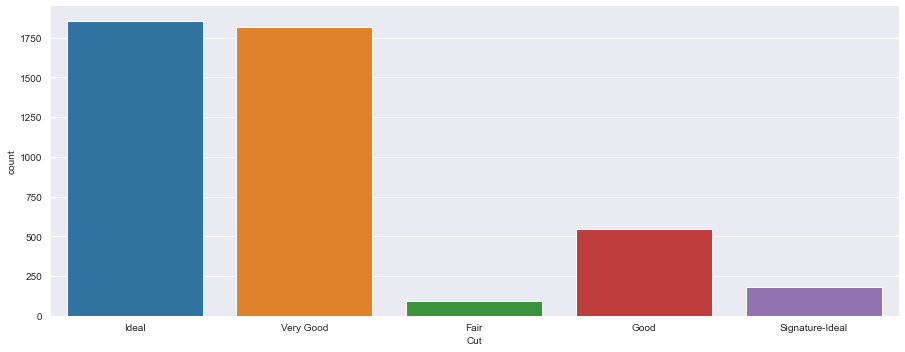

In [16]:
sns.factorplot(x='Cut', data=data , kind='count',aspect=2.5 )

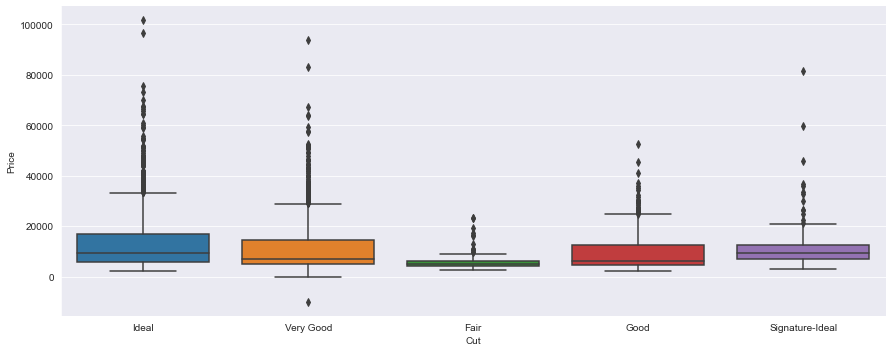

In [17]:
sns.factorplot(x='Cut', y='Price', data=data, kind='box' ,aspect=2.5 )

Text(0.5, 0, 'Cut')

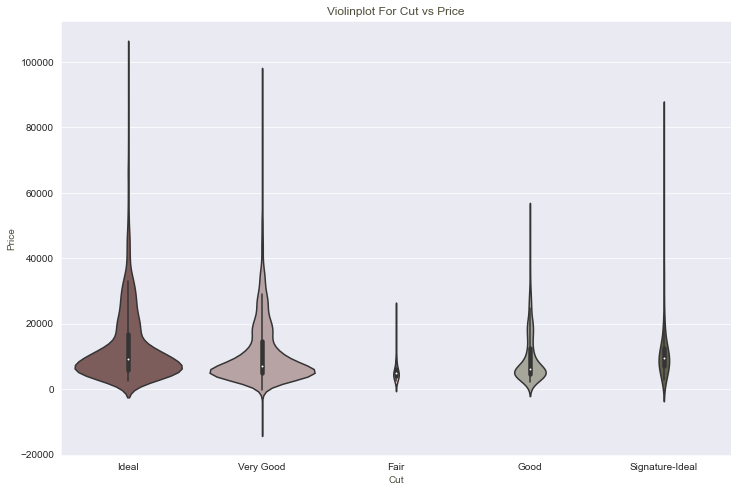

In [18]:
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="Cut",y="Price", data=data, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

In [31]:
data[data['Price']<0].head(20)

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
1246,1247,1.12,Very Good,G,SI1,VG,G,GIA,-234.0
1349,1350,1.03,Very Good,I,SI1,VG,G,GIA,-10001.0


In [32]:
data = data.drop(labels=1246, axis=0)
data = data.drop(labels=1349, axis=0)

In [33]:
data[data['Price']<0].head(20)

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price


In [34]:
data.columns

Index(['ID', 'Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

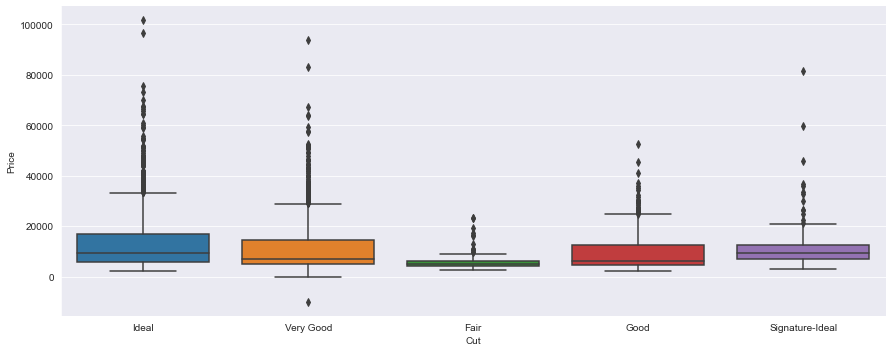

In [19]:
sns.factorplot(x='Cut', y='Price', data=data, kind='box' ,aspect=2.5 )

In [20]:
dct = {'Ideal':3, 'Very Good':2, 'Fair':0, 'Good':1, 'Signature-Ideal':3}
data['cut']=data['Cut'].map(dct)
param_color = {'H':4, 'E':1, 'G':3, 'D':0, 'F':2, 'I':5}
data['color']=data['Color'].map(param_color)
param_color = {'SI1':6, 'VS1':4, 'VS2':5, 'VVS2':3, 'VVS1':2, 'IF':1, 'FL':0}
data['clarity']=data['Clarity'].map(param_color)

label_Polish = preprocessing.LabelEncoder()
label_Symmetry = preprocessing.LabelEncoder()
label_Report = preprocessing.LabelEncoder()

data['Polish'] = label_Polish.fit_transform(data['Polish'])
data['Symmetry'] = label_Symmetry.fit_transform(data['Symmetry'])
data['Report'] = label_Report.fit_transform(data['Report'])
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
df= data[numerical_columns].copy()

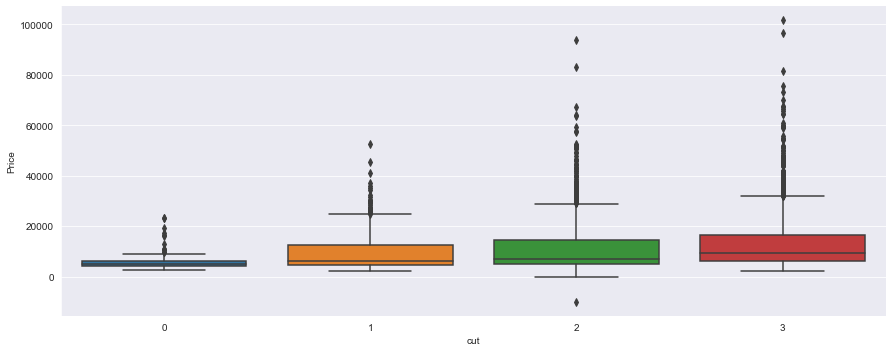

In [21]:
sns.factorplot(x='cut', y='Price', data=data, kind='box' ,aspect=2.5 )

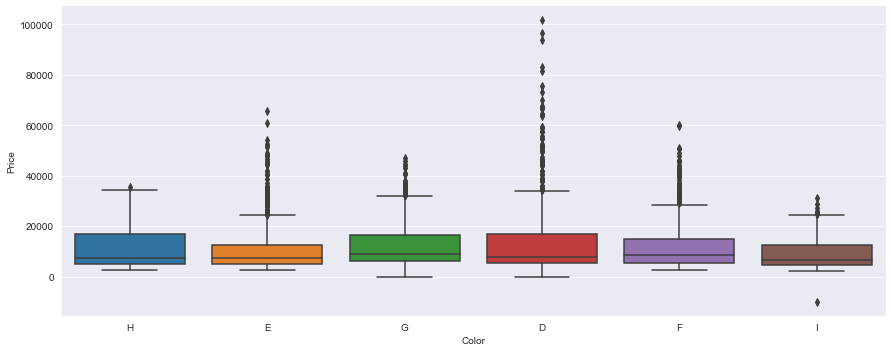

In [22]:
sns.factorplot(x='Color', y='Price', data=data, kind='box' ,aspect=2.5 )

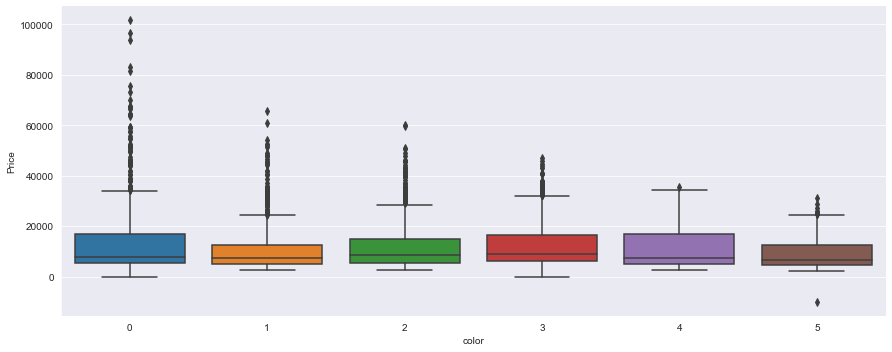

In [23]:
sns.factorplot(x='color', y='Price', data=data, kind='box' ,aspect=2.5 )

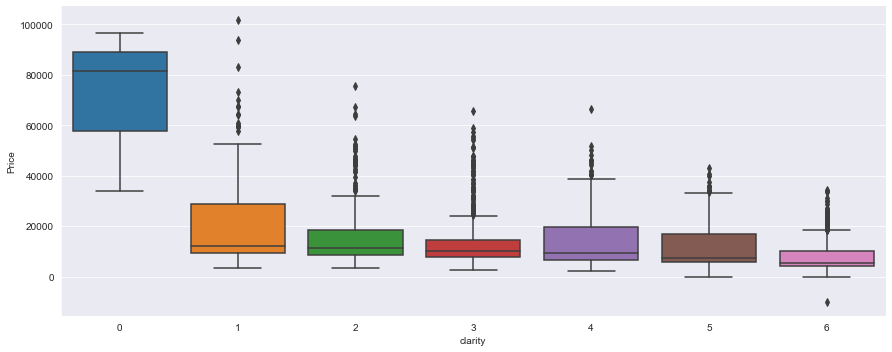

In [24]:
sns.factorplot(x='clarity', y='Price', data=data, kind='box' ,aspect=2.5 )

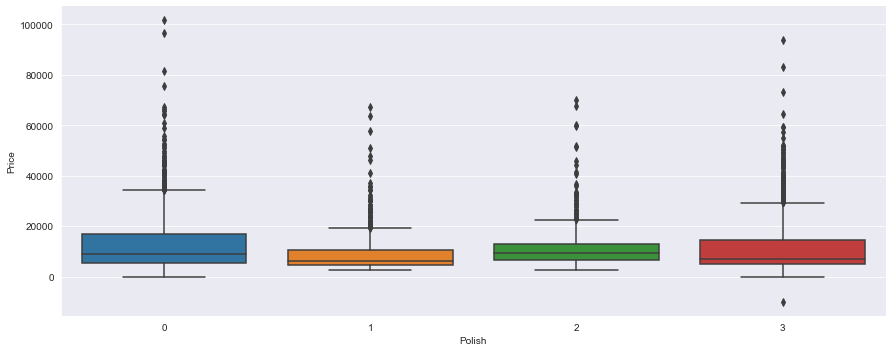

In [25]:
sns.factorplot(x='Polish', y='Price', data=data, kind='box' ,aspect=2.5 )

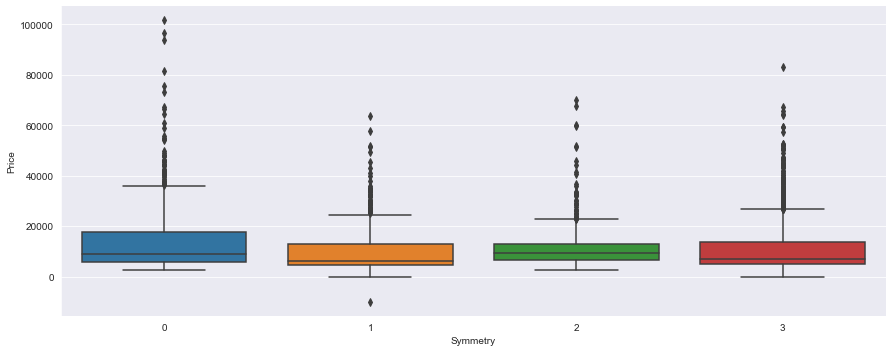

In [26]:
sns.factorplot(x='Symmetry', y='Price', data=data, kind='box' ,aspect=2.5 )

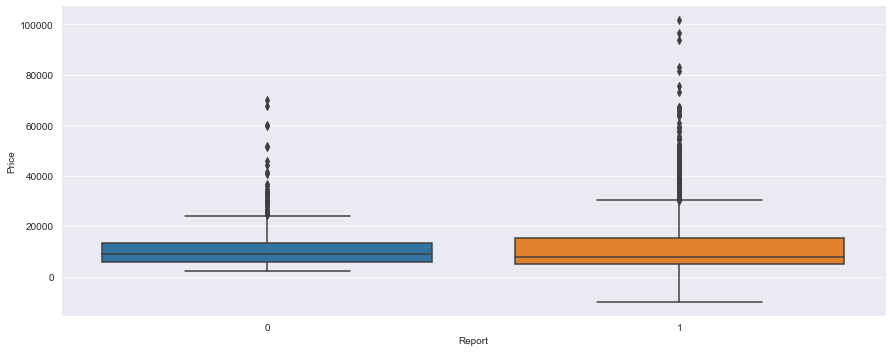

In [27]:
sns.factorplot(x='Report', y='Price', data=data, kind='box' ,aspect=2.5 )

<AxesSubplot:>

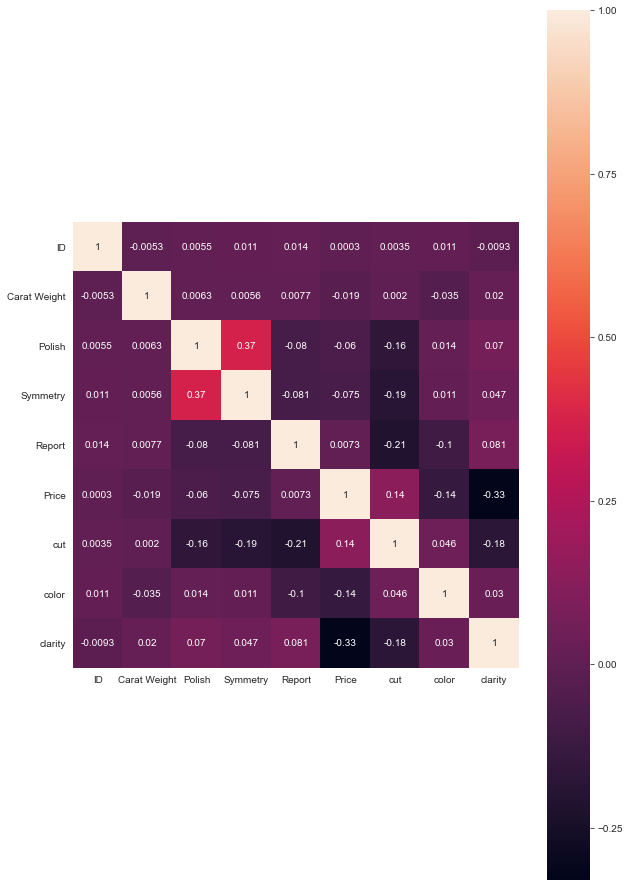

In [28]:
plt.figure(figsize=(10, 16))
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [ ]:
# label_Report = preprocessing.LabelEncoder()
# data['Report'] = label_Report.fit_transform(data['Report'])

In [37]:
# col = ['Color', 'Clarity', 'Polish', 'Symmetry']
# for i in col:
#     data_1 = pd.get_dummies(data[i],drop_first=True) 
#     data = pd.concat([data,data_1],axis=1)
# data

In [42]:
data = data.drop(['Cut', 'Color', 'Clarity'], axis=1)

In [94]:
delited_carat = data[data['Carat Weight']>10].index
df = data.drop(labels=delited_carat, axis=0)

<AxesSubplot:xlabel='Price'>

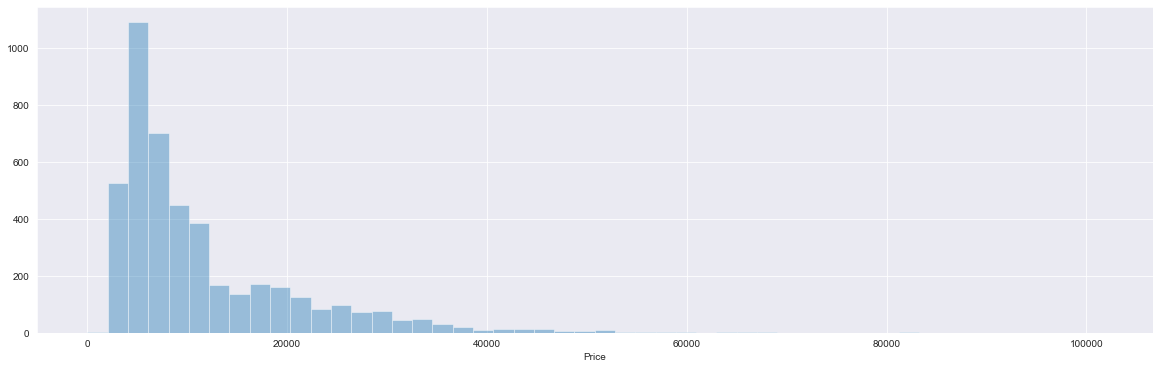

In [44]:
fig = plt.figure(figsize=(20, 6))
sns.distplot(df['Price'], kde=False)

In [45]:
df.head()

,ID,Carat Weight,Polish,Symmetry,Report,Price,cut,color,clarity
0,1,1.10,3,0,1,5169.0,3,4,6
1,2,0.83,2,2,0,3470.0,3,4,4
2,3,0.85,0,0,1,3183.0,3,4,6
3,4,0.91,3,3,1,4370.0,3,1,6
4,5,0.83,0,0,1,3171.0,3,3,6


In [47]:
def get_try_number(x):
    if x<1:
        return 0
    elif x<1.48:
        return 1
    elif x<1.98:
        return 2
    else:
        return 3

In [98]:
df['bunch']= df.apply(lambda x: get_try_number(x['Carat Weight']),axis=1)
df

,ID,Carat Weight,Polish,Symmetry,Report,Price,cut,color,clarity,bunch
0,1,1.10,3,0,1,5169.0,3,4,6,1
1,2,0.83,2,2,0,3470.0,3,4,4,0
2,3,0.85,0,0,1,3183.0,3,4,6,0
3,4,0.91,3,3,1,4370.0,3,1,6,0
4,5,0.83,0,0,1,3171.0,3,3,6,0
...,...,...,...,...,...,...,...,...,...,...
4495,4496,0.90,3,3,1,4095.0,2,2,6,0
4496,4497,1.01,3,3,1,4078.0,1,5,6,1
4497,4498,0.90,3,1,1,4497.0,2,0,6,0
4498,4499,1.21,3,3,1,6439.0,2,3,6,1


In [53]:
df[df['bunch']==3]['Carat Weight']

8       2.11
13      2.51
15      2.20
20      2.60
23      2.02
        ... 
4469    2.00
4477    2.45
4479    2.09
4485    2.07
4488    2.28
Name: Carat Weight, Length: 947, dtype: float64

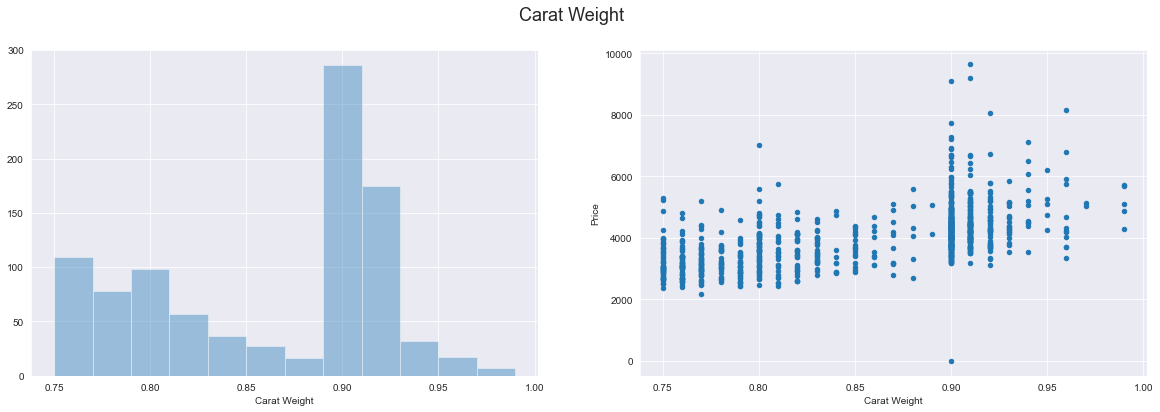

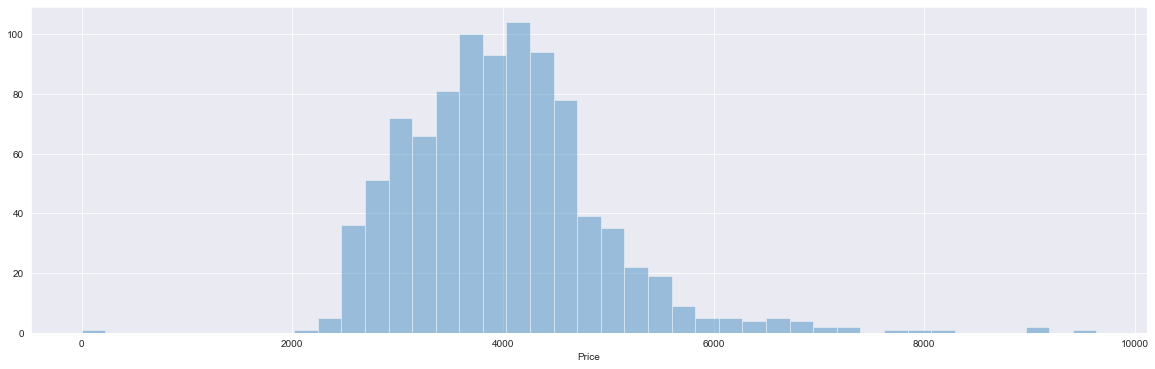

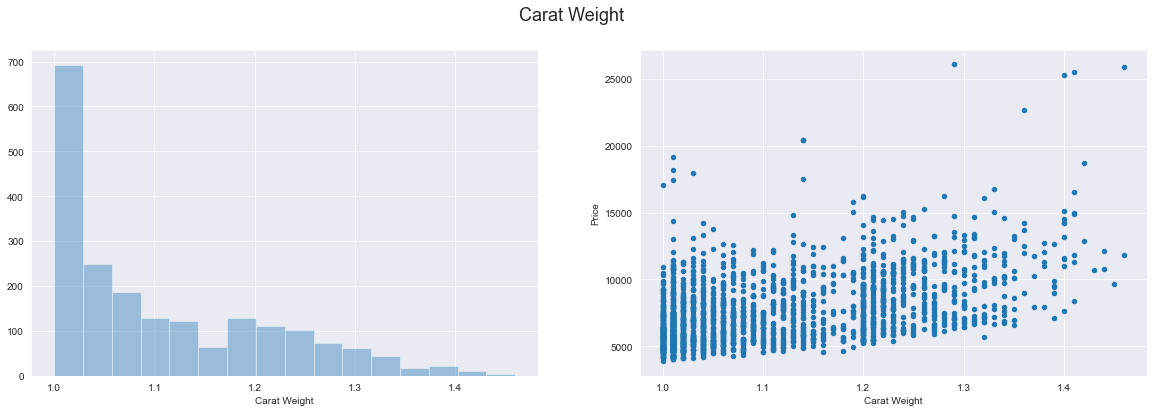

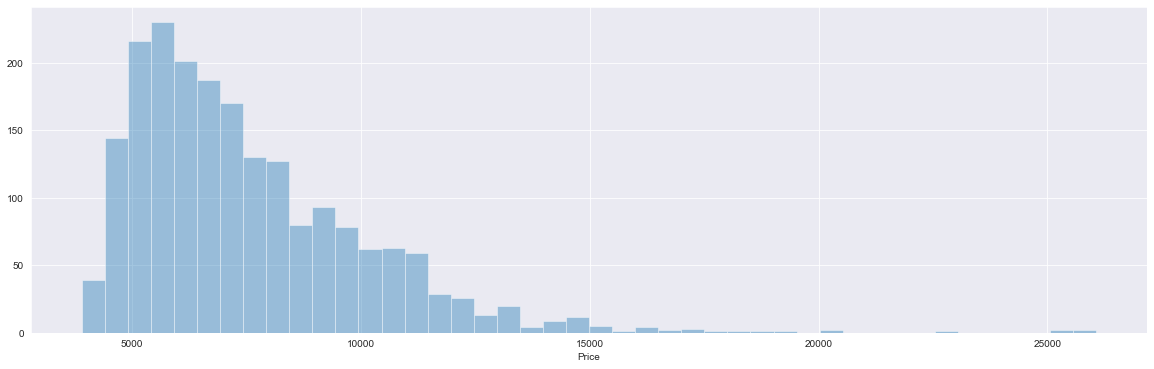

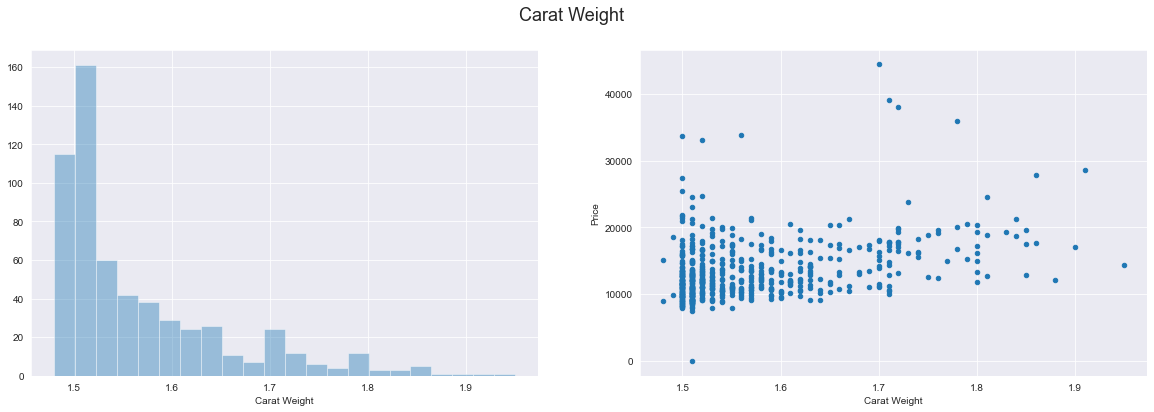

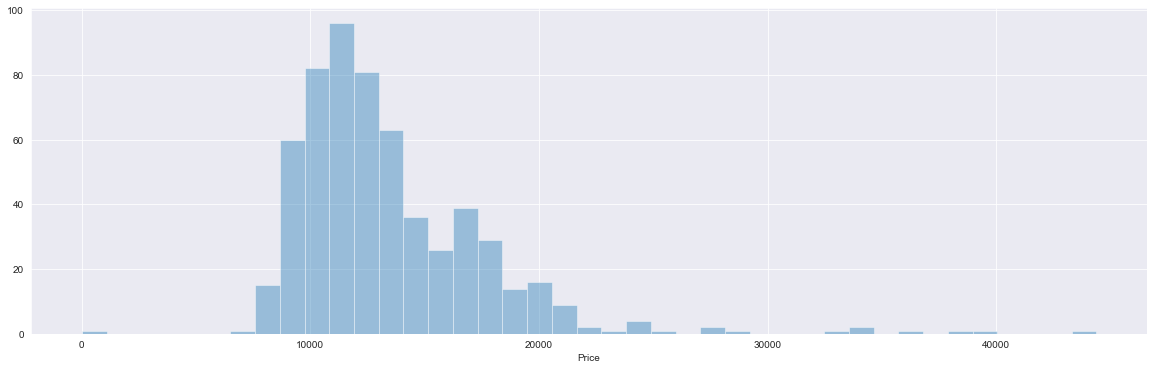

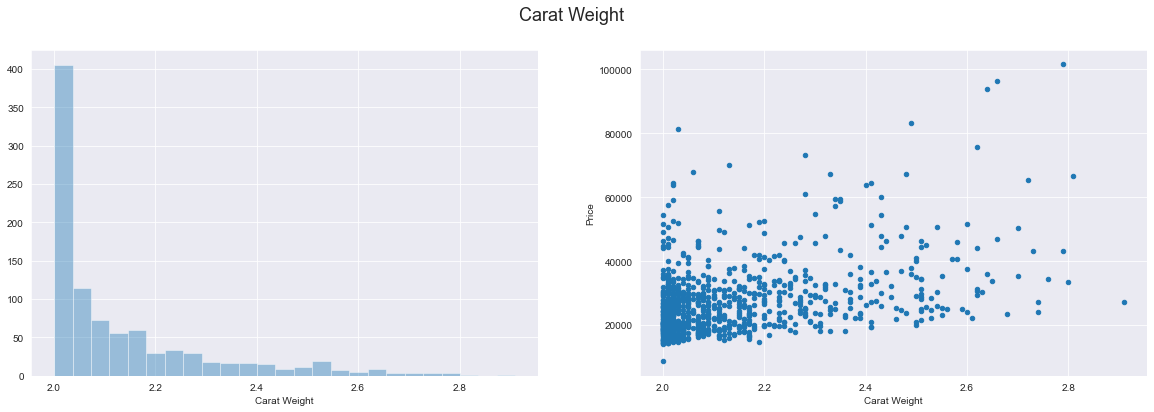

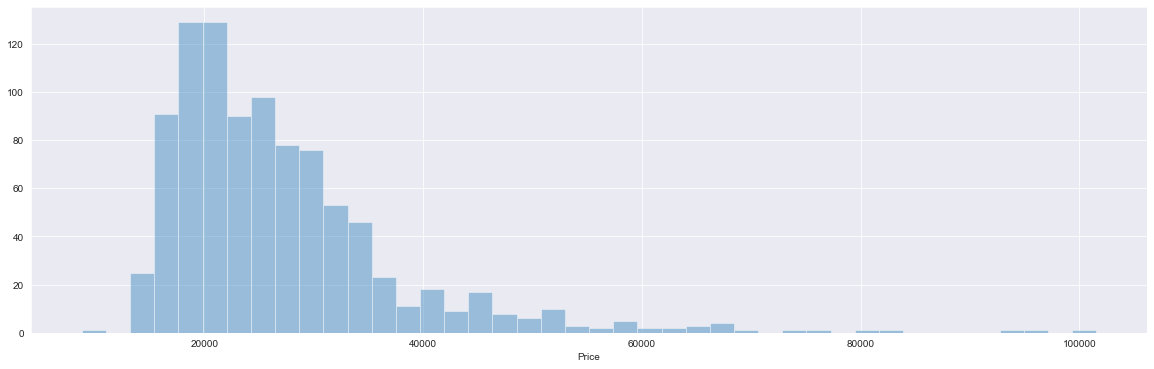

In [111]:
df[df['bunch']==3]
for i in range(4):
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle('Carat Weight', fontsize=18)
    sns.distplot(df[df['bunch']==i]['Carat Weight'], ax=ax[0], kde=False)
    df[df['bunch']==i][['Carat Weight']+['Price']].plot.scatter(x='Carat Weight', y='Price', ax=ax[1])
    plt.show()
    fig = plt.figure(figsize=(20, 6))
    sns.distplot(df[df['bunch']==i]['Price'], kde=False)

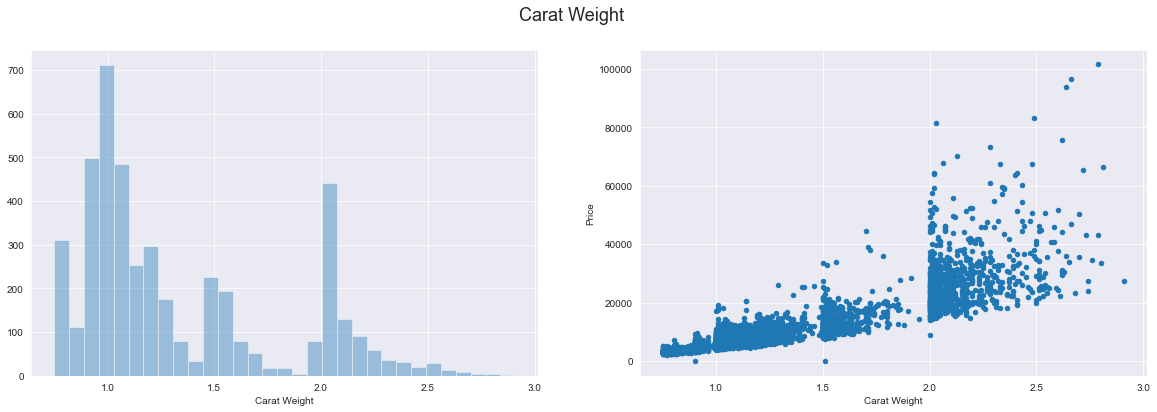

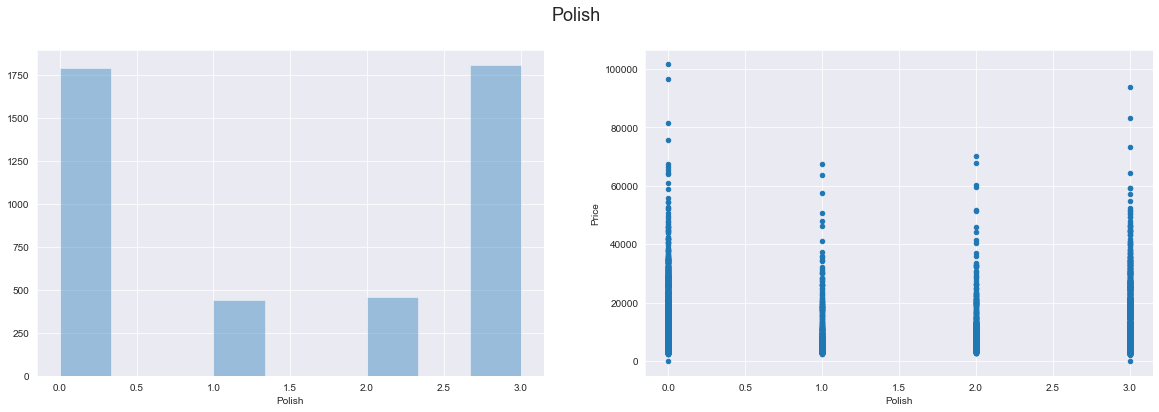

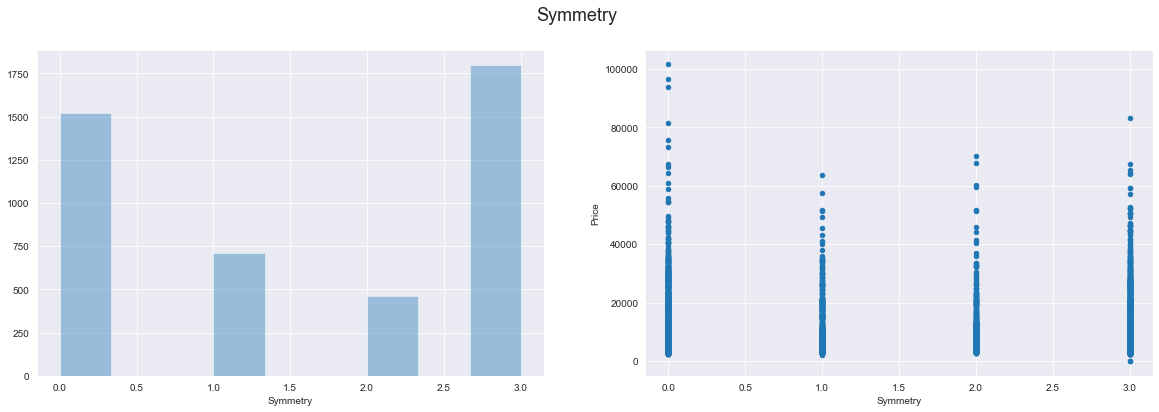

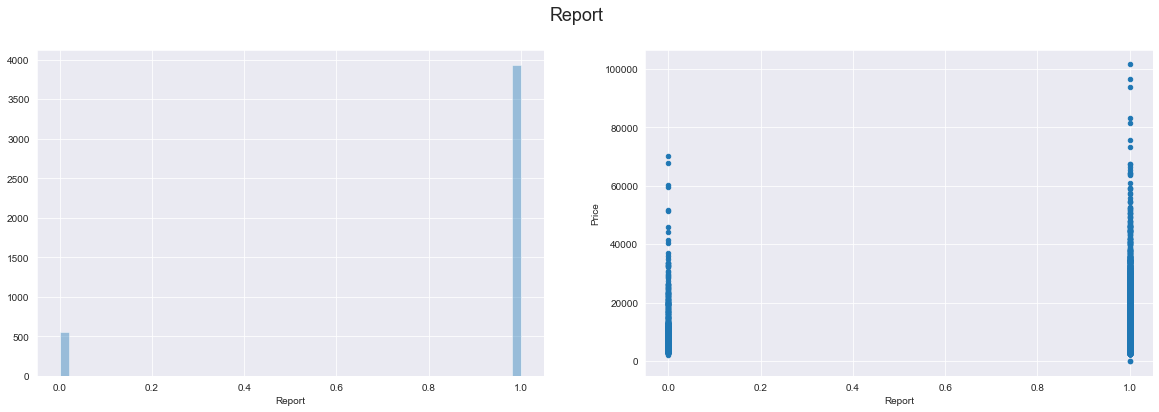

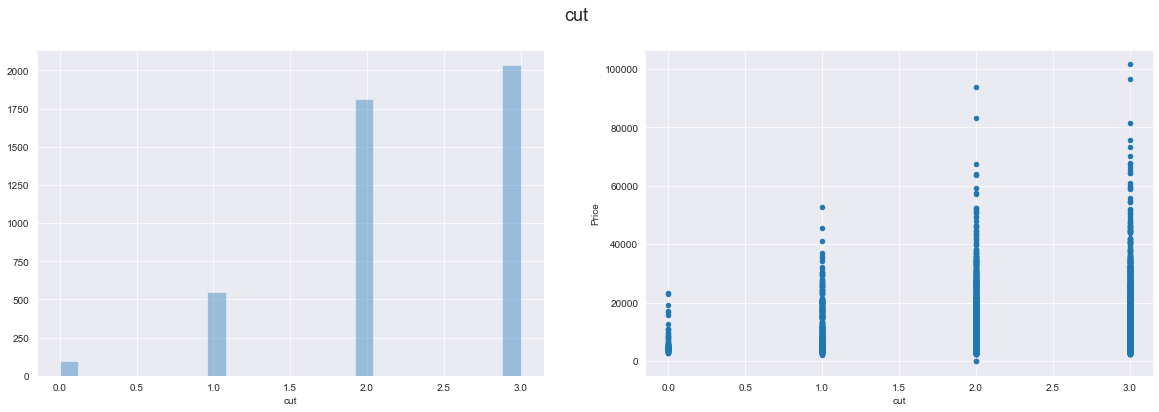

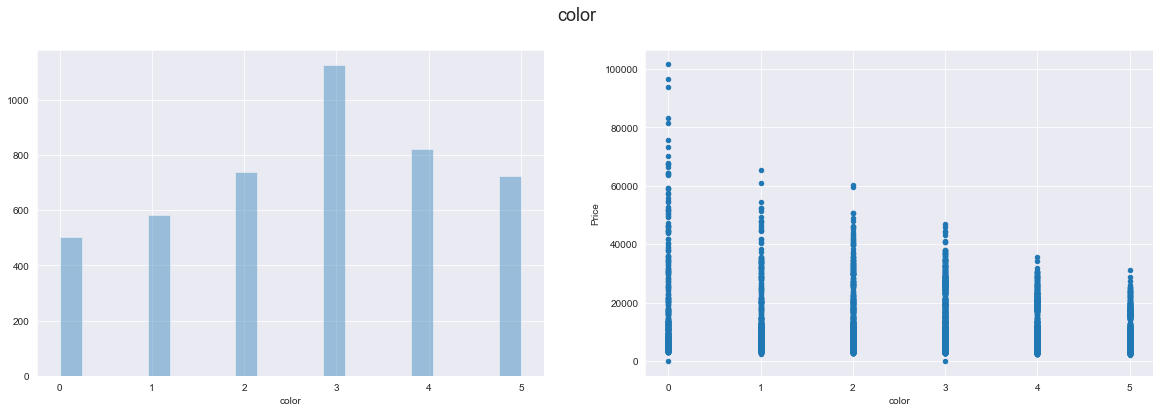

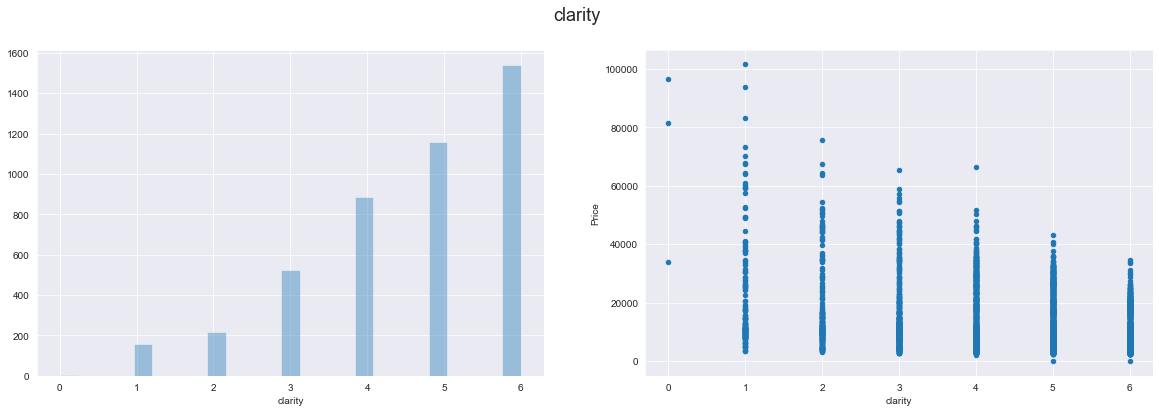

In [46]:
for col in ['Carat Weight', 'Polish', 'Symmetry', 'Report', 'cut', 'color', 'clarity']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(df[col], ax=ax[0], kde=False)
    df[[col]+['Price']].plot.scatter(x=col, y='Price', ax=ax[1])
    plt.show()

In [36]:
delited_cl = df[df['clarity']==0].index
df = df.drop(labels=delited_cl, axis=0)
df[df['clarity']==0]

,ID,Carat Weight,Polish,Symmetry,Report,Price,cut,color,clarity


In [30]:
df

,ID,Carat Weight,Report,Price,Good,Ideal,Signature-Ideal,Very Good,E,F,G,H,I,IF,SI1,VS1,VS2,VVS1,VVS2,G,ID,VG,G,ID,VG
0,1,1.10,1,5169.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2,0.83,0,3470.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,3,0.85,1,3183.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,0.91,1,4370.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,5,0.83,1,3171.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4496,0.90,1,4095.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4496,4497,1.01,1,4078.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
4497,4498,0.90,1,4497.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4498,4499,1.21,1,6439.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1


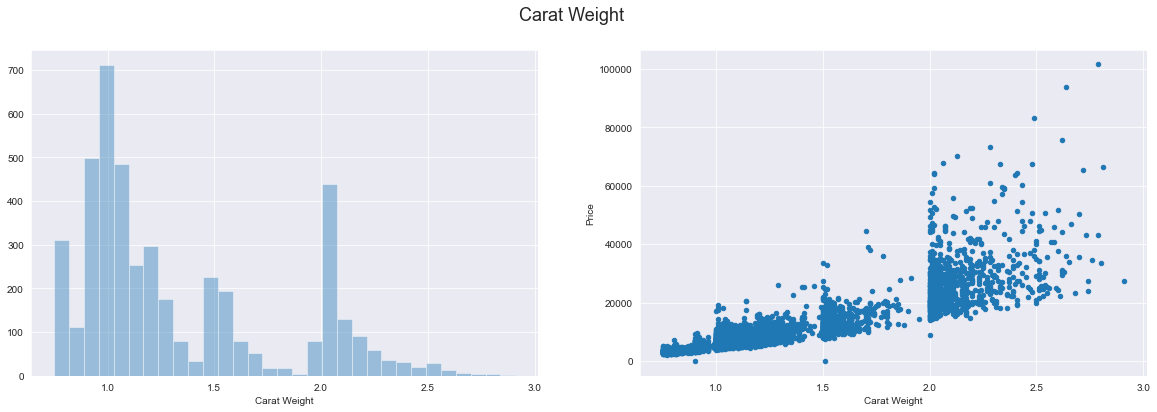

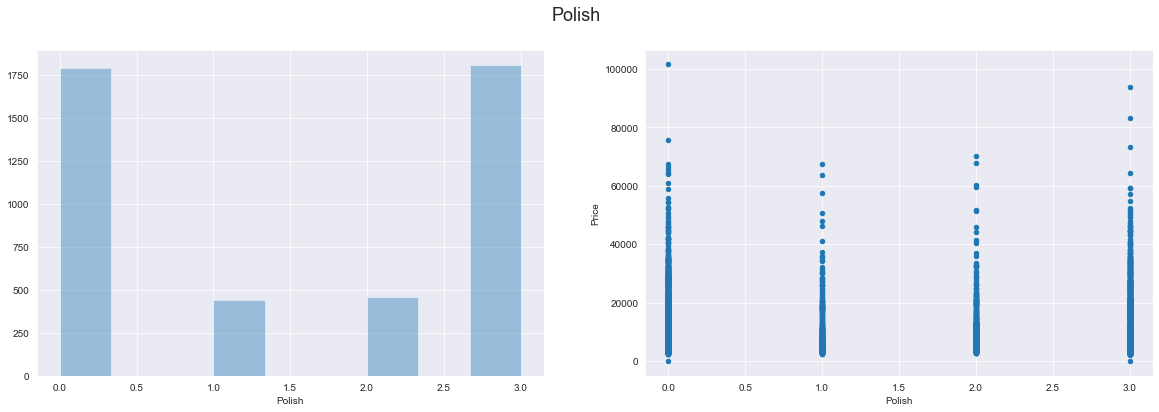

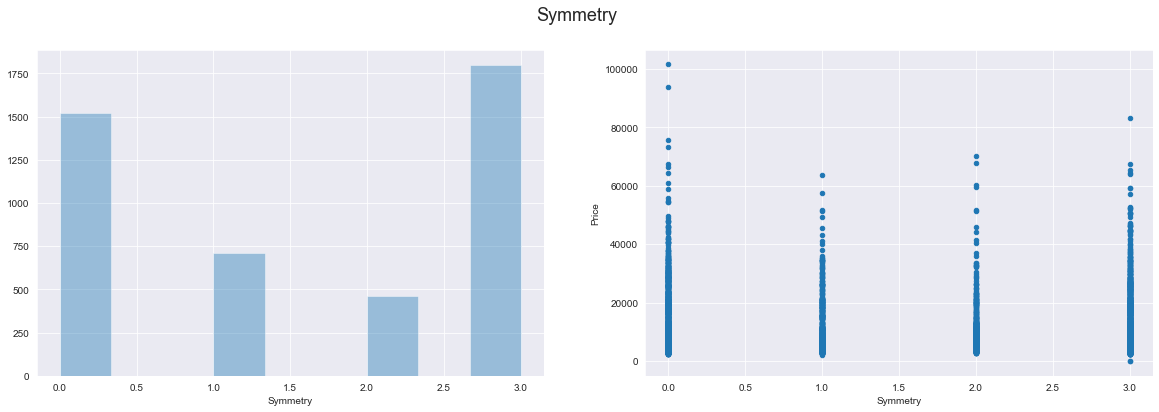

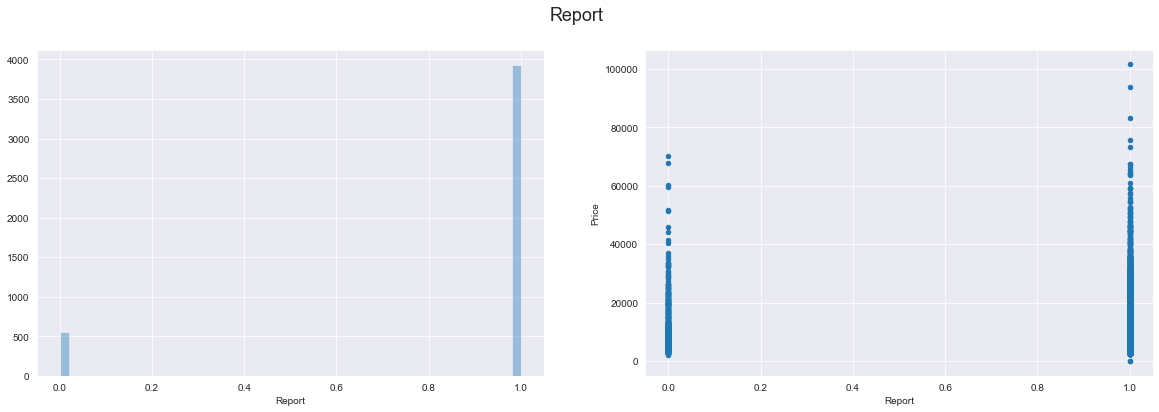

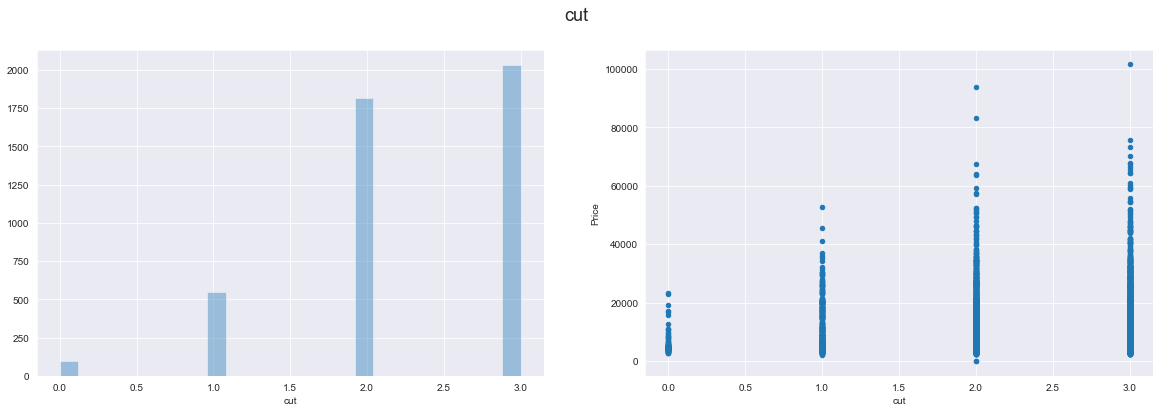

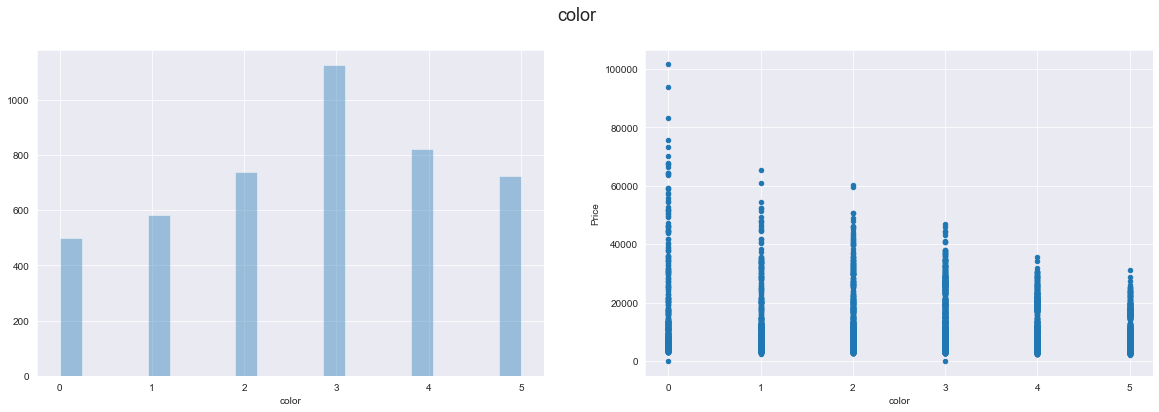

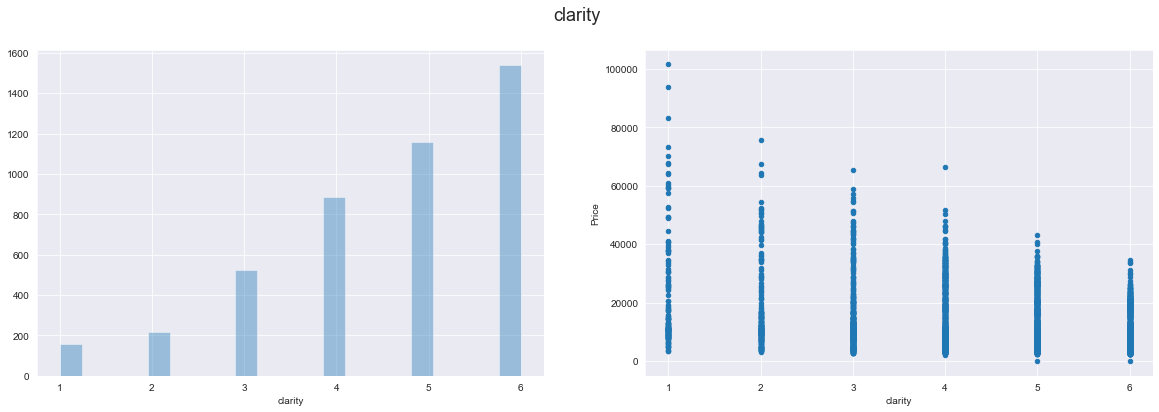

In [37]:
for col in ['Carat Weight', 'Polish', 'Symmetry', 'Report', 'cut', 'color', 'clarity']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(df[col], ax=ax[0], kde=False)
    df[[col]+['Price']].plot.scatter(x=col, y='Price', ax=ax[1])
    plt.show()

<AxesSubplot:>

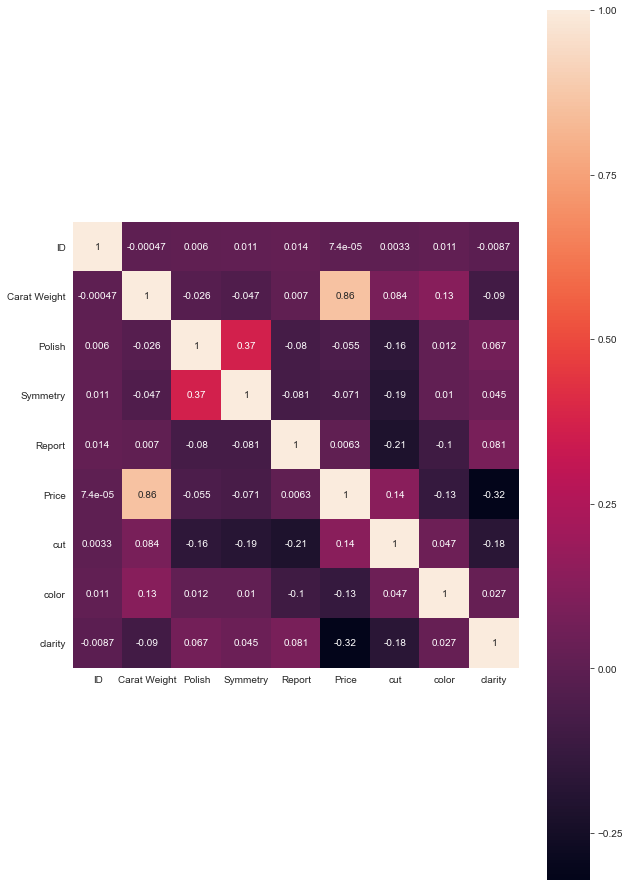

In [38]:
plt.figure(figsize=(10, 16))
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [39]:
# Price-the best
# Price clarety but clarety depends color
# color 0.14 price but claretu 30% price
# cut 0.18 clarety

#clarety 3 fl(flawless) maby spoil quality

In [34]:
# X = df.drop(['Price','Polish', 'Symmetry', 'Report'], axis=1)
y = df['Price']
X = df.drop(['Price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [35]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [37]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


####### Linear Regression #######
Score : 0.8627
[ 8.57554123e-01  8.53979580e-01  8.90862974e-01  8.34533291e-01
 -5.68153724e+21]

MSE    : 15041838.24 
MAE    : 2456.02 
RMSE   : 3878.38 
R2     : 0.86 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [38]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Lasso Regression ######
Score : 0.8425
[0.85990598 0.85137185 0.89550357 0.82853537 0.82365629]

MSE    : 17255923.98 
MAE    : 2407.22 
RMSE   : 4154.03 
R2     : 0.84 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [39]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.6243
[0.61574897 0.60376213 0.56761994 0.57380474 0.68203531]

MSE    : 41149742.62 
MAE    : 5727.49 
RMSE   : 6414.81 
R2     : 0.62 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s finished


In [40]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


###### Ridge Regression ######
Score : 0.6121
[0.6573733  0.61774193 0.72466655 0.59171856 0.58899931]

MSE    : 42489215.45 
MAE    : 3812.89 
RMSE   : 6518.38 
R2     : 0.61 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [41]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    87047276.3479            0.20s
         2    77360096.6924            0.25s
         3    69483447.4048            0.23s
         4    63072242.7358            0.22s
         5    57795163.9950            0.21s
         6    53288952.9257            0.20s
         7    49605464.7124            0.20s
         8    46448034.1358            0.19s
         9    43876765.3662            0.19s
        10    41664092.7464            0.19s
        20    30606158.4214            0.17s
        30    25946476.3445            0.13s
        40    23060999.1263            0.11s
        50    21121900.6490            0.09s
        60    19690829.4842            0.07s
        70    18589907.6569            0.05s
        80    17742681.1599            0.04s
        90    17078382.1882            0.02s
       100    16549023.2563            0.00s
      Iter       Train Loss   Remaining Time 
         1    91068117.8431            0.20s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1    84697528.0662            0.10s
         2    75224440.8967            0.24s
         3    67525800.8134            0.23s
         4    61266680.3301            0.22s
         5    56045675.8960            0.19s
         6    51678719.9959            0.19s
         7    48061359.2245            0.17s
         8    44968498.8561            0.17s
         9    42436092.4270            0.17s
        10    40319937.0915            0.16s
        20    29270243.9712            0.15s
        30    24928716.1089            0.13s
        40    22304267.3139            0.11s
        50    20503877.2146            0.09s
        60    19145578.1282            0.07s
        70    18095994.3815            0.05s
        80    17285063.5811            0.03s
        90    16647440.4277            0.02s
       100    16128062.7864            0.00s
      Iter       Train Loss   Remaining Time 
         1    91301734.7439            0.19s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [42]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.9601
[0.96980877 0.94871141 0.96313593 0.95122756 0.94035315]

MSE    : 4370225.98 
MAE    : 813.96 
RMSE   : 2090.51 
R2     : 0.96 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished


In [43]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished



###### KNeighbours Regression ######
Score : 0.6676
[0.70487135 0.68110026 0.65050033 0.61708456 0.63070825]

MSE    : 36409347.63 
MAE    : 3521.90 
RMSE   : 6034.02 
R2     : 0.67 


In [44]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

ValueError: arrays must all be same length

In [ ]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

In [56]:
# X = df.drop(['Price','Polish', 'Symmetry', 'Report'], axis=1)
y = df['Price']
X = df.drop(['Price'], axis=1)
# X = df[['Carat Weight', 'clarity']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Collect all R2 Scores.
R2_Scores_2 = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']
X.head()

,ID,Carat Weight,Polish,Symmetry,Report,cut,color,clarity,bunch
0,1,1.10,3,0,1,3,4,6,1
1,2,0.83,2,2,0,3,4,4,0
2,3,0.85,0,0,1,3,4,6,0
3,4,0.91,3,3,1,3,1,6,0
4,5,0.83,0,0,1,3,3,6,0


In [57]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores_2.append(r2)


####### Linear Regression #######
Score : 0.8551
[0.85918688 0.85141805 0.89074683 0.83672039 0.83654975]

MSE    : 15874847.51 
MAE    : 2498.29 
RMSE   : 3984.33 
R2     : 0.86 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [58]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores_2.append(r2)


###### Lasso Regression ######
Score : 0.8520
[0.86087674 0.84865243 0.89368099 0.83528761 0.83143288]

MSE    : 16214446.16 
MAE    : 2474.50 
RMSE   : 4026.72 
R2     : 0.85 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [59]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores_2.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished



###### AdaBoost Regression ######
Score : 0.7336
[0.66740644 0.76172555 0.65733914 0.54408416 0.78942472]

MSE    : 29181999.44 
MAE    : 4889.26 
RMSE   : 5402.04 
R2     : 0.73 


In [60]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores_2.append(r2)


###### Ridge Regression ######
Score : 0.7018
[0.75219963 0.69946906 0.80426406 0.68375757 0.67154821]

MSE    : 32660751.60 
MAE    : 2999.78 
RMSE   : 5714.96 
R2     : 0.70 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [61]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores_2.append(r2)

      Iter       Train Loss   Remaining Time 
         1    87047276.3479            0.20s
         2    77360096.6924            0.20s
         3    69483447.4048            0.23s
         4    63072242.7358            0.24s
         5    57795163.9950            0.23s
         6    53288952.9257            0.20s
         7    49605464.7124            0.20s
         8    46448034.1358            0.18s
         9    43876765.3662            0.18s
        10    41664092.7464            0.17s
        20    30042752.7240            0.14s
        30    24467039.1334            0.12s
        40    20971352.5949            0.10s
        50    18594714.7777            0.08s
        60    16953057.6138            0.06s
        70    15746297.2214            0.05s
        80    14853555.4186            0.03s
        90    14184988.1214            0.02s
       100    13681372.1717            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1    91068117.8431            0.10s
         2    81003680.5021            0.15s
         3    72828504.0246            0.13s
         4    66155720.0565            0.14s
         5    60729283.1979            0.13s
         6    56044929.7801            0.14s
         7    52245890.2227            0.13s
         8    48992287.0180            0.13s
         9    46303251.0045            0.13s
        10    44020783.7161            0.13s
        20    31635455.9705            0.10s
        30    25728534.6131            0.10s
        40    22002463.6138            0.08s
        50    19445781.6386            0.07s
        60    17661518.4649            0.05s
        70    16355249.3981            0.04s
        80    15392869.4912            0.03s
        90    14671813.6758            0.01s
       100    14132299.3604            0.00s
      Iter       Train Loss   Remaining Time 
         1    84697528.0662            0.20s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [62]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
print('----------------------------------------')
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores_2.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished



###### Random Forest ######
Score : 0.9798
[0.97964585 0.97421001 0.9843796  0.97569996 0.9713812 ]

MSE    : 2212083.06 
MAE    : 767.61 
RMSE   : 1487.31 
R2     : 0.98 
----------------------------------------
Score : 0.9800
R2     : 0.98 


In [63]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
print('--------------------')
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores_2.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished



###### KNeighbours Regression ######
Score : 0.9269
[0.92599681 0.9207096  0.93704629 0.90985769 0.89585971]

MSE    : 8008490.77 
MAE    : 1482.48 
RMSE   : 2829.93 
R2     : 0.93 
--------------------
Score : 0.9269
R2     : 0.93 


In [64]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores_2})
compare.sort_values(by='R2-Scores' ,ascending=False)


,Algorithms,R2-Scores
5,RandomForest Regression,0.980038
6,KNeighbours Regression,0.926884
4,GradientBoosting Regression,0.861343
0,Linear Regression,0.855066
1,Lasso Regression,0.851966
2,AdaBoost Regression,0.733575
3,Ridge Regression,0.701815


<AxesSubplot:xlabel='R2-Scores', ylabel='Algorithms'>

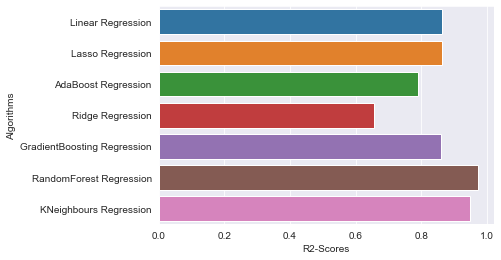

In [105]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

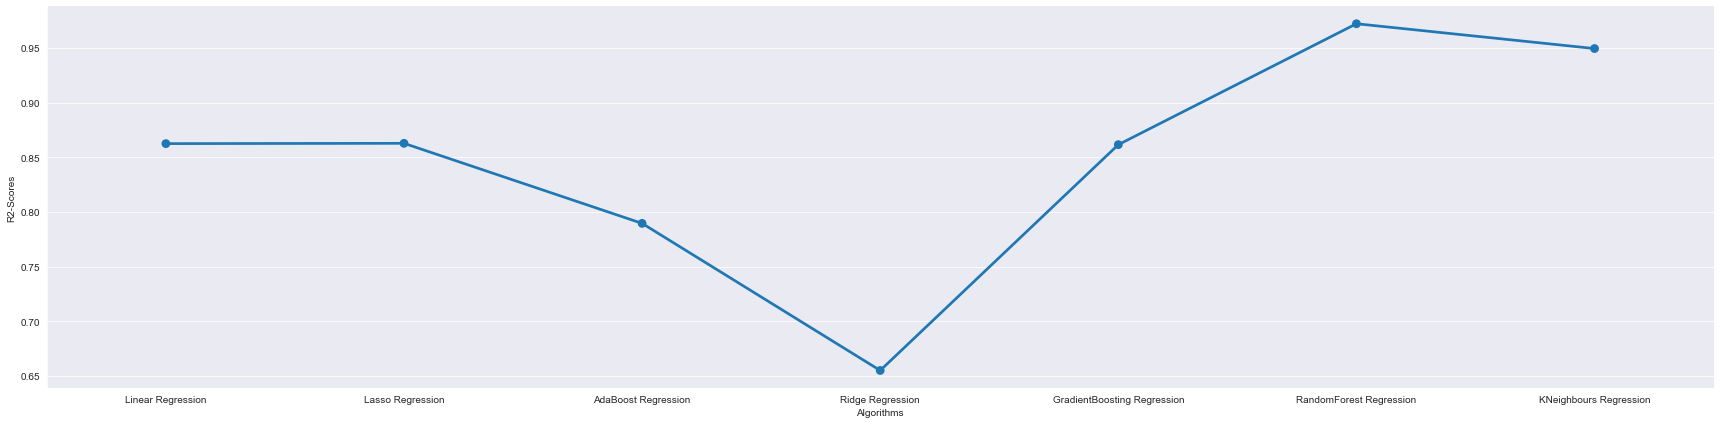

In [106]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=6 , aspect=4)

In [71]:
from xgboost import XGBRFRegressor, XGBRegressor
import xgboost as xgb

In [67]:
clf_XGBR = XGBRegressor()
clf_XGBR.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_XGBR, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_XGBR.predict(X_test)
print('')
print('###### XGBRegressor ######')
print('Score : %.4f' % clf_XGBR.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### XGBRegressor ######
Score : 0.9835
[0.98514823 0.98188947 0.98165751 0.9809841  0.97972559]
MSE    : 1809649.98 
MAE    : 735.75 
RMSE   : 1345.23 
R2     : 0.98 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [68]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
    ,'predictor': 'gpu_predictor'
}

In [95]:
df

,ID,Carat Weight,Polish,Symmetry,Report,Price,cut,color,clarity
0,1,1.10,3,0,1,5169.0,3,4,6
1,2,0.83,2,2,0,3470.0,3,4,4
2,3,0.85,0,0,1,3183.0,3,4,6
3,4,0.91,3,3,1,4370.0,3,1,6
4,5,0.83,0,0,1,3171.0,3,3,6
...,...,...,...,...,...,...,...,...,...
4495,4496,0.90,3,3,1,4095.0,2,2,6
4496,4497,1.01,3,3,1,4078.0,1,5,6
4497,4498,0.90,3,1,1,4497.0,2,0,6
4498,4499,1.21,3,3,1,6439.0,2,3,6


In [106]:
X_train

,ID,Carat Weight,Polish,Symmetry,Report,cut,color,clarity,bunch
546,547,1.01,3,3,1,2,1,1,1
4422,4423,0.91,3,3,1,3,0,6,0
3538,3539,1.01,0,0,1,2,5,6,1
3724,3725,2.01,3,3,1,3,4,4,3
942,943,1.01,1,3,1,1,0,4,1
...,...,...,...,...,...,...,...,...,...
1748,1749,1.08,0,0,1,3,5,6,1
51,52,1.62,0,0,1,3,2,5,2
632,633,1.52,0,3,1,3,2,3,2
830,831,1.68,3,3,1,3,4,6,2


In [100]:
y = df['Price']
X = df.drop(['Price'], axis=1)
# X = df[['Carat Weight', 'clarity']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [107]:
xgb_train = xgb.DMatrix(X_train.drop(['bunch','ID'],axis=1)
                        , y_train
                        , feature_names = [str(i) for i in X_train.drop(['bunch','ID'],axis=1).columns]
                        , enable_categorical=True)
model = xgb.train(params = xgb_params
                  , dtrain = xgb_train
                  , num_boost_round = 1000)



[23:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [108]:
xgb_test = xgb.DMatrix(X_test.drop(['bunch','ID'],axis=1)
                        , feature_names = [str(i) for i in X_test.drop(['bunch','ID'],axis=1).columns]
                        , enable_categorical=True)
y_pred = model.predict(xgb_test)

In [109]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

MSE    : 1611245.15 
MAE    : 704.61 
RMSE   : 1269.35 
R2     : 0.99 


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

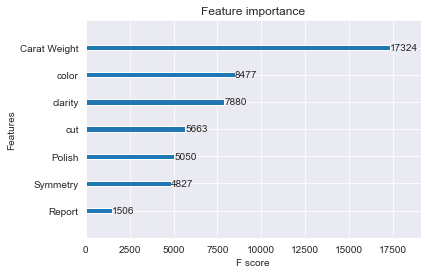

In [110]:
xgb.plot_importance(model)

In [ ]:
for bunch in X_train.bunch.unique():
    df = test_x[test_x.bunch==bunch]

In [82]:
X_train['price']=y_train
X_test['price']=y_test
X_train

,ID,Carat Weight,Polish,Symmetry,Report,cut,color,clarity,bunch,price
546,547,1.01,3,3,1,2,1,1,1,11042.0
4422,4423,0.91,3,3,1,3,0,6,0,4460.0
3538,3539,1.01,0,0,1,2,5,6,1,4759.0
3724,3725,2.01,3,3,1,3,4,4,3,19593.0
942,943,1.01,1,3,1,1,0,4,1,7163.0
...,...,...,...,...,...,...,...,...,...,...
1748,1749,1.08,0,0,1,3,5,6,1,4705.0
51,52,1.62,0,0,1,3,2,5,2,18281.0
632,633,1.52,0,3,1,3,2,3,2,17914.0
830,831,1.68,3,3,1,3,4,6,2,13375.0


In [84]:
model_dict = {}
for bunch in X_train.bunch.unique():
    df = X_train[X_train.bunch==bunch]
    xgb_train = xgb.DMatrix(df.drop(['bunch','price'],axis=1)
                        , df['price']
                        , feature_names = [str(i) for i in df.drop(['bunch','price'],axis=1).columns]
                        , enable_categorical=True)
    model = xgb.train(params = xgb_params
                  , dtrain = xgb_train
                  , num_boost_round = 1000)
    model_dict[bunch] = model

[23:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost cor

In [85]:
df_w_price =pd.DataFrame() 
for bunch in X_test.bunch.unique():
    print(bunch)
    model = model_dict[bunch]
    pre_y = X_test[X_test.bunch == bunch]
    xgb_test = xgb.DMatrix(pre_y.drop(['price','bunch'], axis=1)
                            , feature_names = pre_y.drop(['price','bunch'], axis=1).columns
                            , enable_categorical=True)
    pre_y['pred_price'] = model.predict(xgb_test)
    df_w_price = pd.concat([df_w_price, pre_y])

1
0
2
3


In [86]:
df_w_price

,ID,Carat Weight,Polish,Symmetry,Report,cut,color,clarity,bunch,price,pred_price
664,665,1.19,3,3,1,2,1,6,1,5956.0,6986.541016
544,545,1.22,0,0,1,3,3,4,1,10572.0,9443.805664
3705,3706,1.07,0,3,1,3,4,6,1,5417.0,5346.481445
4304,4305,1.02,0,0,1,3,3,5,1,6445.0,7094.941406
3394,3395,1.08,3,3,1,2,1,3,1,9607.0,9517.972656
...,...,...,...,...,...,...,...,...,...,...,...
1490,1491,2.01,3,3,1,2,1,4,3,35302.0,31561.441406
2661,2662,2.01,0,0,1,2,5,6,3,15126.0,15078.947266
3650,3651,2.01,1,1,1,2,0,1,3,57595.0,56669.335938
3044,3045,2.02,3,3,1,1,3,5,3,25270.0,23631.806641


In [87]:
y_test=df_w_price.price
y_pred=df_w_price.pred_price
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

MSE    : 1833123.62 
MAE    : 729.84 
RMSE   : 1353.93 
R2     : 0.98 
